In [3]:
import urllib.request as request; exec(request.urlopen('https://perso.esiee.fr/~perretb/AlgorithmDesign/algo_helper.py').read(), globals())

# Algorithm Design
## Chapter 2 - Data structures

### Unique elements in a list

**Implement `unique` in the following function.**

You can use the `sort` function, you cannot use a `dictionary` or a `set`.

The unit test must says that your function seems correct.

In [2]:
def unique(a):
    a.sort()
    b = []
    j = 0
    i = 0
    while i < len(a):
        b.append(a[i])
        while i < len(a) - 1 and a[i] == a[i + 1]:
            i += 1
        i += 1
    return b


test_unique(unique);


--- Running test: 
✔  unique([]) -> []
✔  unique([0, 0, 0, 0]) -> [0]
✔  unique([-1, -1, 3, 3, 3, 4, 4, 11, 22]) -> [-1, 3, 4, 11, 22]
✔  unique([2, 2, 3, 3, 4, 6, 7, 7, 7, 9]) -> [2, 3, 4, 6, 7, 9]
✔  unique([1, 2, 2, 2, 3, 4, 7, 7, 7, 8]) -> [1, 2, 3, 4, 7, 8]
✔  unique([1, 2, 3, 6, 6, 6, 7, 8, 8, 8]) -> [1, 2, 3, 6, 7, 8]
✔  unique([1, 2, 3, 3, 5, 6, 7, 8, 9, 9]) -> [1, 2, 3, 5, 6, 7, 8, 9]
✔  unique([2, 3, 4, 4, 5, 6, 6, 7, 9, 9]) -> [2, 3, 4, 5, 6, 7, 9]
✔ 8/8 tests passed.
--- Test finished.


### Intersection of two lists

**Implement `inter` in the following function.**

You can use the `sort` function, you cannot use a `dictionary` or a `set`.

The unit test must says that your function seems correct.

In [4]:
def inter(a, b):
    a.sort()
    b.sort()
    c = []
    i = 0
    j = 0
    while i < len(a) and j < len(b):
        if a[i] < b[j]:
            i += 1
        elif a[i] > b[j]:
            j += 1
        else:
            c.append(a[i])
            i += 1
            j += 1
    return unique(c)

test_inter(inter);

--- Running test: 
✔  inter([], []) -> []
✔  inter([0, 1], []) -> []
✔  inter([], [0, 1]) -> []
✔  inter([1, 1, 4, 5, 5, 5, 5, 8, 8, 8], [4, 4, 5, 6, 7, 8, 8, 8, 9, 9]) -> [4, 5, 8]
✔  inter([0, 0, 2, 3, 4, 4, 6, 6, 7, 8], [0, 0, 3, 3, 4, 5, 5, 7, 8, 8]) -> [0, 3, 4, 7, 8]
✔  inter([0, 0, 3, 3, 3, 4, 5, 5, 6, 8], [0, 0, 1, 1, 1, 3, 4, 6, 7, 9]) -> [0, 3, 4, 6]
✔  inter([0, 1, 3, 4, 6, 6, 7, 8, 9, 9], [1, 1, 2, 3, 3, 4, 7, 7, 8, 8]) -> [1, 3, 4, 7, 8]
✔  inter([0, 0, 1, 2, 3, 6, 6, 7, 7, 8], [0, 3, 3, 5, 7, 7, 8, 8, 9, 9]) -> [0, 3, 7, 8]
✔ 8/8 tests passed.
--- Test finished.


### Reverse Polish Notation

**Implement `reverse_polish_evaluation` in the following function.**

The input is a string containing integers and symbols + and * encoding a mathematical expression in reverse Polish notation and the function returns the value of the expression.
 
The unit test must says that your function seems correct.

In [5]:
def reverse_polish_evaluation(s):
    
    tokens = s.split()
    stack = []

    for token in tokens:
        if token.isdigit():
            stack.append(int(token))
        else:
            b = stack.pop()
            a = stack.pop()
            if token == "+":
                stack.append(a + b)
            elif token == "-":
                stack.append(a - b)
            elif token == "*":
                stack.append(a * b)
            elif token == "/":
                stack.append(a / b)

    return stack.pop()

test_reverse_polish_evaluation(reverse_polish_evaluation);   


--- Running test: 
✔  reverse_polish_evaluation(3 2 + 4 *) -> 20
✔  reverse_polish_evaluation(3 2 4 * +) -> 11
✔  reverse_polish_evaluation(3 2 4 + *) -> 18
✔  reverse_polish_evaluation(3 2 4 + * 2 +) -> 20
✔  reverse_polish_evaluation(3 2 4 + 2 * +) -> 15
✔ 5/5 tests passed.
--- Test finished.


### Syntax Error

**Implement `is_balanced` in the following function.**

The class `List` in Python provides effectively implements a stack with the following interface:

* `s.append(e)`: push a new element on the top of the stack
* `s.pop()`: remove and return the element at the top of the stack

The unit test must says that your function seems correct.

In [15]:
def is_balanced(s):
    stack = []
    pairs = {')': '(', ']': '[', '}': '{'}

    for element in s:
        if element in '([{':
            stack.append(element)
        elif element in ')]}':
            if not stack or stack.pop() != pairs[element]:
                return False
    return len(stack) == 0

test_is_balanced(is_balanced)

--- Running test: 
✔  is_balanced() -> True
✔  is_balanced(()) -> True
✔  is_balanced([]) -> True
✔  is_balanced(([)]) -> False
✔  is_balanced(([])) -> True
✔  is_balanced(([) -> False
✔  is_balanced([()[]]) -> True
✔  is_balanced()) -> False
✔ 8/8 tests passed.
--- Test finished.


True

### Heap sort

**Implement `heap_sort` in the following function.**

The class `bheap` is a simple wrapper around some Python utility functions to create a binary heap.
 
The unit test must says that your function seems correct.

In [4]:
class bheap:
    # simple binary heap wrapper class around python heapq class
    # to match the interface presented in the course

    def __init__(self):
        # create an empty binary heap
        self.heap = []

    def insert(self, element):
        # insert a new element in the heap
        import heapq
        heapq.heappush(self.heap, element)

    def find_min(self):
        # find the minimum element in the heap
        return self.heap[0]

    def delete_min(self):
        # remove the minimum element in the heap
        import heapq
        heapq.heappop(self.heap)

    def size(self):
        # number of elements in the heap
        return len(self.heap)

    
def heap_sort(array):
    heap = bheap()
    b = []
    for element in array:
        heap.insert(element=element)
    
    while heap.size():
        b.append(heap.find_min())
        heap.delete_min()
    
    return b
 
unit_test_sort(heap_sort, inplace=False)

--- Running test: 
✔  heap_sort([0.55 0.72 0.6  0.54 0.42 0.65 0.44 0.89 0.96 0.38]) -> [np.float64(0.3834415188257777), np.float64(0.4236547993389047), np.float64(0.4375872112626925), np.float64(0.5448831829968969), np.float64(0.5488135039273248), np.float64(0.6027633760716439), np.float64(0.6458941130666561), np.float64(0.7151893663724195), np.float64(0.8917730007820798), np.float64(0.9636627605010293)]
✔  heap_sort([0.07 0.51 0.86 0.46 0.05 0.25 0.29 0.71 0.87 0.69]) -> [np.float64(0.051535517572631306), np.float64(0.07005430217953057), np.float64(0.2520336548773837), np.float64(0.28683725069858), np.float64(0.457128179647577), np.float64(0.5149948129099204), np.float64(0.691267802976893), np.float64(0.7081966564495585), np.float64(0.8619018485169045), np.float64(0.8710186745267269)]
✔  heap_sort([0.18 0.38 0.28 0.13 0.35 0.4  0.08 0.85 0.21 0.5 ]) -> [np.float64(0.08211423363071546), np.float64(0.12841209943970655), np.float64(0.1768687633638648), np.float64(0.21261289648276271), n

True

Now let's verify that the runtime of the implemented algorithm matches the expected runtime complexity.

We are going to run the implemented algorithm on three kind of inputs of various sizes:

- already sorted arrays
- reverse sorted arrays
- random arrays

**What is the best and worst case time complexity of the algorithm?**

**Does the execution runtime of the implementation matches with those theoretical runtime complexities?**

--- Running runtime test for 'heap_sort':
	 - Input is a sorted array:
		array size: 1,024 -> time 0.849 s
		array size: 2,048 -> time 1.461 s
		array size: 4,096 -> time 2.768 s
		array size: 8,192 -> time 5.302 s
		array size: 16,384 -> time 8.703 s
		array size: 32,768 -> time 17.328 s
		array size: 65,536 -> time 34.742 s
		array size: 131,072 -> time 71.030 s
	 - Input is a reverse sorted array:
		array size: 1,024 -> time 0.553 s
		array size: 2,048 -> time 1.146 s
		array size: 4,096 -> time 2.249 s
		array size: 8,192 -> time 4.635 s
		array size: 16,384 -> time 9.679 s
		array size: 32,768 -> time 19.799 s
		array size: 65,536 -> time 40.099 s
		array size: 131,072 -> time 83.549 s
	 - Input is a random array:
		array size: 1,024 -> time 0.522 s
		array size: 2,048 -> time 1.046 s
		array size: 4,096 -> time 2.207 s
		array size: 8,192 -> time 4.536 s
		array size: 16,384 -> time 9.274 s
		array size: 32,768 -> time 19.235 s
		array size: 65,536 -> time 40.201 s
		array size: 

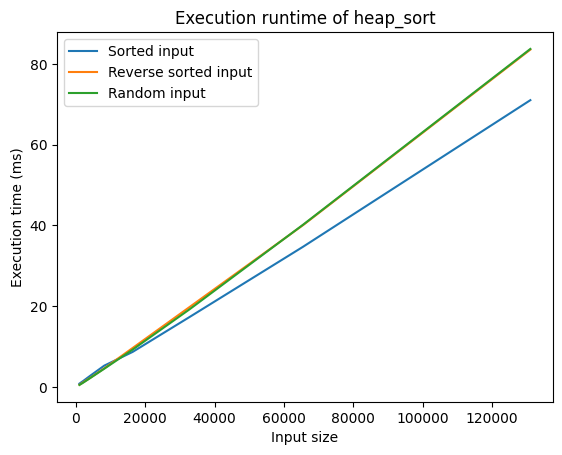

In [23]:
runtime_test_sort(heap_sort, [2**i for i in range(10, 18)])

### Dynamic array insertion

**Implement the two functions `new_size` and `insert_back` of the class `dynamic_array` and compare the runtime of the two strategies.**

The unit test must says that your function seems correct.

In [34]:
import math
class dynamic_array():

    def __init__(self, strategy):
        """
        Create an empty dynamic array. 
        The allocation strategy can either be "linear" or "geometric"
        """
        import numpy as np
        self.array = np.array([0], dtype=np.int64)
        self.num_elements = 0
        self.strategy = strategy

    def at(self, k):
        """
        Return the k-th element
        """
        return self.array[k]

    def size(self):
        """
        Return the number of elements
        """
        return self.num_elements
    
    def capacity(self):
        """
        Return the capacity of the storage array
        """
        return len(self.array)

    def increase_size(self):
        """
        Increases the size of the storage array
        """
        import numpy as np
        new_size = self.new_size()
        new_array = np.empty((new_size, ), dtype=np.int64)
        new_array[:len(self.array)] = self.array[:]
        self.array = new_array

    def new_size(self):
        ########################
        #
        # When we increase the size of the storage array: returns the size of the new storage:
        # If self.strategy is equal to "linear" the new size is len(self.array) + 5.
        # If self.strategy is equal to "geometric" the new size is len(self.array) * 2.
        #
        # Your code here !
        #
        ########################
        i = len(self.array)
        if self.strategy == "linear":
            return i + 5
        elif self.strategy == "geometric":
            return  i * 2

    def insert_back(self, e):
        ########################
        #
        # Insert element at the end of the dynamic array
        # If the array is full (self.num_elements == len(self.array)), you must first increase
        # the size of the storage array by calling the function increase_size
        #
        # Your code here !
        #
        ########################
        end = self.size()
        if self.size() == self.capacity():
            self.increase_size()
        
        self.array[end] = e
        self.num_elements += 1


unit_test_dynamic_array(dynamic_array)

--- Running test: Strategy: linear
✔ 3000/3000 tests passed.
--- Test finished.
--- Running test: Strategy: geometric
✔ 3000/3000 tests passed.
--- Test finished.


Now let's verify that the runtime of the implemented algorithm matches the expected runtime complexity.

Recall what is the expected amortized runtime complexity on $n$ operations `insert_back` on a dynamic array with the resizing strategy:

- linear?
- geometric?

**Does the execution runtime of the implementation matches with those theoretical runtime complexities?**

Dynamic array 
	Linear allocation
		 1000 -> 0.0014541149139404297
		 4000 -> 0.0009090304374694824
		 7000 -> 0.0006932871682303293
		 10000 -> 0.000641322135925293
		 13000 -> 0.0006553026346059946
		 16000 -> 0.0007067620754241943
		 19000 -> 0.0007353581880268298
		 22000 -> 0.000753142616965554
		 25000 -> 0.000770244598388672
		 28000 -> 0.0008092182023184641
		 31000 -> 0.0008283584348617062
		 34000 -> 0.0008675841724171358
		 37000 -> 0.000882709348523939
		 40000 -> 0.00092201828956604
		 43000 -> 0.0009430452834728152
		 46000 -> 0.0010262779567552648
		 49000 -> 0.0010372084014269771
		 52000 -> 0.0010479046748234676
		 55000 -> 0.0010589599609375
		 58000 -> 0.0010890179666979561
		 61000 -> 0.0011240966984483061
		 64000 -> 0.001169200986623764
		 67000 -> 0.0011865060720870743
		 70000 -> 0.0012226581573486328
	Geometric allocation
		 1000 -> 0.0002739429473876953
		 4000 -> 0.00027298927307128906
		 7000 -> 0.000270707266671317
		 10000 -> 0.00026590824127197265
		 1300

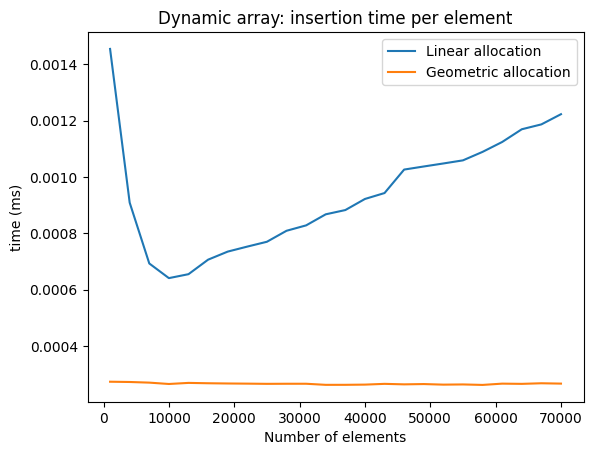

In [35]:
plot_dynamic_array_runtime(dynamic_array)

### Dequeue based on dynamic arrays

**Implement the functions  of the class `dequeuea` below.**

The unit test must says that your function seems correct.

In [9]:
import numpy as np


class dequeuea:
    # A dequeue based on a dynamic array

    def __init__(self):
        # create an empty dequeue
        self.array = np.zeros(10, dtype=np.int64)
        self._size = 0
        self.front_index = 0
        self.back_index = -1

    def size(self):
        # return the number of elements in the queue
        return self._size

    def peek_front(self):
        # return the element at the front of the queue
        if self._size == 0:
            raise IndexError("Cannot peek from empty dequeue")
        return self.array[self.front_index]

    def peek_back(self):
        # return the element at the back of the queue
        if self._size == 0:
            raise IndexError("Cannot peek from empty dequeue")
        return self.array[self.back_index]

    def _increase_array_size(self):
        # increase the size of the array with a growth factor of 2
        new_size = len(self.array) * 2
        new_array = np.zeros(new_size, dtype=np.int64)
        
        # Copy existing elements
        if self._size > 0:
            new_array[:self._size] = self.array[self.front_index:self.front_index + self._size]
        
        # Reset indices
        self.front_index = 0
        self.back_index = self._size - 1 if self._size > 0 else -1
        self.array = new_array

    def insert_front(self, ne):
        # insert a new element at the front of the queue
        if self._size >= len(self.array):
            self._increase_array_size()
        
        if self._size == 0:
            self.front_index = 0
            self.back_index = 0
            self.array[0] = ne
        else:
            if self.front_index == 0:
                self._increase_array_size()
            self.front_index -= 1
            self.array[self.front_index] = ne
        
        self._size += 1

    def insert_back(self, ne):
        # insert a new element at the back of the queue
        # Check if we need to resize BEFORE incrementing back_index
        if self.back_index + 1 >= len(self.array):
            self._increase_array_size()
        
        self.back_index += 1
        self.array[self.back_index] = ne
        self._size += 1

    def remove_front(self):
        # remove the element at the front of the queue
        if self._size == 0:
            raise IndexError("Cannot remove from empty dequeue")
        
        self.front_index += 1
        self._size -= 1
        
        if self._size == 0:
            self.front_index = 0
            self.back_index = -1

    def remove_back(self):
        # remove the element at the back of the queue
        if self._size == 0:
            raise IndexError("Cannot remove from empty dequeue")
        
        self.back_index -= 1
        self._size -= 1
        
        if self._size == 0:
            self.front_index = 0
            self.back_index = -1
test_dequeue(dequeuea);

--- Running test: 
✔ 14/14 tests passed.
--- Test finished.


The following execution example can help you debug your code

In [12]:

def print_info(dq):
    if dq.size() > 0:
        print("Dequeue: size:", dq.size(), "front", dq.peek_front(), "back",
              dq.peek_back())
    else:
        print("Dequeue: size:", dq.size())


dq = dequeuea()

print("insert front 1")
dq.insert_front(1)
print_info(dq)
print("insert back 2")
dq.insert_back(2)
print_info(dq)
print("remove back")
dq.remove_back()
print_info(dq)
print("remove back")
dq.remove_back()
print_info(dq)

print("insert front 0, 1, 2, 3, 4, 5")
print("insert back 6, 7")
for i in range(6):
    dq.insert_front(i)
for i in range(6, 8):
    dq.insert_back(i)
print_info(dq)

insert front 1
Dequeue: size: 1 front 1 back 1
insert back 2
Dequeue: size: 2 front 1 back 2
remove back
Dequeue: size: 1 front 1 back 1
remove back
Dequeue: size: 0
insert front 0, 1, 2, 3, 4, 5
insert back 6, 7
Dequeue: size: 8 front 5 back 7


### Reverse singly linked list

**Implement the functions `reverse_list` below.**

The unit test must says that your function seems correct.

In [17]:
class SinglyLinkedListNode:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

    def __str__(self):
        s = "(" 
        n = self
        while n != None:
            s += str(n.value)
            if n.next != None:
                s += " -> "
            n = n.next

        s += ")"
        return s



def reverse_list(sl_list):
    # function that reverse a singly linked list
    # sl_list: head of the singly linked list (type SinglyLinkedListNode)
    # return: head node of the reversed list
    head = sl_list
    if head.next == None:
        return head
    prev = None
    while head.next != None:
        x = head.next
        head.next = prev
        prev = head
        head = x
    head.next = prev
    return head



test_reverse_single_linked_list(reverse_list, SinglyLinkedListNode);

--- Running test: 
✔ 1/1 tests passed.
--- Test finished.


The following execution example can help you debug your code

In [18]:
n = None
for i in range(8, -1, -1):
    n = SinglyLinkedListNode(i, n)

print("Original list:", str(n))

nl = reverse_list(n)
print("Reversed: ", str(nl))

Original list: (0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8)
Reversed:  (8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0)
